In [454]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

##Ôn tập giữa kì  
#Câu 1
I = ([  
    [4, 4, 1, 1, 2, 1],  
    [109, 8, 8, 7, 1, 2],  
    [8, A, 8, 7, 1, 1],  
    [8, 8, B, 8, 7, 1],  
    [8, 8, 8, 8, 1, 2],  
    [8, 8, 7, 8, 1, 1]  
    ])  
A = số máy  
B = mssv

a) Xác định Gaussian kernel 3x3 với sigma = 0.25, 0.5, 0.75, 0.95, 1.25  
Giải

In [455]:
kernel_size = 3
#gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
#gaussian_kernel_2d = gaussian_kernel @ gaussian_kernel.T
sigma = 0.25
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel @ gaussian_kernel.T
print("sigma = 0.25 ta có kernel: \n", gaussian_kernel_2d)

sigma = 0.5
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel @ gaussian_kernel.T
print("sigma = 0.5 ta có kernel: \n", gaussian_kernel_2d)

sigma = 0.75
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel @ gaussian_kernel.T
print("sigma = 0.75 ta có kernel: \n", gaussian_kernel_2d)

sigma = 0.95
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel @ gaussian_kernel.T
print("sigma = 0.95 ta có kernel: \n", gaussian_kernel_2d)

sigma = 1.25
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel @ gaussian_kernel.T
print("sigma = 0.25 ta có kernel: \n", gaussian_kernel_2d)

sigma = 0.25 ta có kernel: 
 [[1.12384321e-07 3.35012940e-04 1.12384321e-07]
 [3.35012940e-04 9.98659499e-01 3.35012940e-04]
 [1.12384321e-07 3.35012940e-04 1.12384321e-07]]
sigma = 0.5 ta có kernel: 
 [[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]
sigma = 0.75 ta có kernel: 
 [[0.05089992 0.12381027 0.05089992]
 [0.12381027 0.30115924 0.12381027]
 [0.05089992 0.12381027 0.05089992]]
sigma = 0.95 ta có kernel: 
 [[0.07148314 0.12439703 0.07148314]
 [0.12439703 0.2164793  0.12439703]
 [0.07148314 0.12439703 0.07148314]]
sigma = 0.25 ta có kernel: 
 [[0.0876809  0.12074781 0.0876809 ]
 [0.12074781 0.16628516 0.12074781]
 [0.0876809  0.12074781 0.0876809 ]]


b) Giải thích cách xác định ảnh đầu ra G sử dụng bộ lọc trung bình Gaussian trên, không sử dụng biên

In [456]:
A = 12
B = 7
I = np.array([
[4, 4, 1, 1, 2, 1],
[109, 8, 8, 7, 1, 2],
[8, A, 8, 7, 1, 1],
[8, 8, B, 8, 7, 1],
[8, 8, 8, 8, 1, 2],
[8, 8, 7, 8, 1, 1]
],dtype=np.float32)
print(I)

[[  4.   4.   1.   1.   2.   1.]
 [109.   8.   8.   7.   1.   2.]
 [  8.  12.   8.   7.   1.   1.]
 [  8.   8.   7.   8.   7.   1.]
 [  8.   8.   8.   8.   1.   2.]
 [  8.   8.   7.   8.   1.   1.]]


In [457]:
# b) Áp dụng Gaussian filter lên ảnh gốc, không sử dụng biên
# Chúng ta cắt bỏ biên bằng cách sử dụng cv2.filter2D và chọn borderType=cv2.BORDER_CONSTANT với giá trị biên là 0.
# Điều này sẽ đảm bảo rằng các pixel ở biên không được sử dụng.
sigma = 0.25
gaussian_kernel = cv2.getGaussianKernel(kernel_size, sigma)
gaussian_kernel_2d = gaussian_kernel @ gaussian_kernel.T
print(gaussian_kernel_2d,"\n")
filtered_image = cv2.filter2D(I, -1, gaussian_kernel_2d, borderType=cv2.BORDER_CONSTANT) #Có biên
print(filtered_image,"\n")
center_image = filtered_image[1:-1, 1:-1] #Không có biên
print(center_image)

[[1.12384321e-07 3.35012940e-04 1.12384321e-07]
 [3.35012940e-04 9.98659499e-01 3.35012940e-04]
 [1.12384321e-07 3.35012940e-04 1.12384321e-07]] 

[[  4.0324955    3.9990063    1.0030164    1.0020107    1.998325
    0.99999964]
 [108.86058      8.033834     7.997319     6.996313     1.0026809
    1.9983243 ]
 [  8.032494    11.994649     8.00067      6.99866      1.0040218
    1.0000005 ]
 [  7.9973187    8.001005     7.0013413    7.9989934    6.9943037
    1.0020099 ]
 [  7.9973183    8.           7.99933      7.997654     1.0046918
    1.9983249 ]
 [  7.994637     7.996983     6.9986587    7.9946375    1.0020107
    0.99966466]] 

[[ 8.033834   7.997319   6.996313   1.0026809]
 [11.994649   8.00067    6.99866    1.0040218]
 [ 8.001005   7.0013413  7.9989934  6.9943037]
 [ 8.         7.99933    7.997654   1.0046918]]


c) Tính giá trị tại G(3, 2) sử dụng Gaussian filter.

In [458]:
#Điểm G(3,2) => hàng thứ 3 cột thứ 2
print(filtered_image[3,2])

7.0013413


d) Xác định ngưỡng T để phân đoạn ảnh bằng phương pháp ngưỡng toàn cục cơ bản.

In [459]:
def Tim_nguong_toan_cuc(img):
    """
    Tìm ngưỡng toàn cục cho ảnh sử dụng phương pháp ngưỡng toàn cục cơ bản.

    Parameters:
    img (np.array): Ma trận ảnh đầu vào.

    Returns:
    float: Ngưỡng tìm được.
    """
    # Bước 1: Khởi tạo ngưỡng ban đầu t bằng giá trị trung bình mức xám của ảnh
    t = np.mean(img)  # Điều kiện ban đầu
    g1 = []  # Nhóm giá trị nhỏ hơn ngưỡng
    g2 = []  # Nhóm giá trị lớn hơn hoặc bằng ngưỡng
    m, n = img.shape

    # Lặp để tính ngưỡng
    while True:
        g1.clear()  # Xóa các giá trị cũ trong nhóm g1
        g2.clear()  # Xóa các giá trị cũ trong nhóm g2

        # Bước 2: Tạo nhóm g1, g2 dựa trên ngưỡng t
        for i in range(m):
            for j in range(n):
                if img[i, j] < t:
                    g1.append(img[i, j])
                else:
                    g2.append(img[i, j])

        # Bước 3: Tính trung bình mức xám trong vùng g1, g2
        mu1 = np.mean(g1) if len(g1) > 0 else 0  # Tránh chia cho 0
        mu2 = np.mean(g2) if len(g2) > 0 else 0  # Tránh chia cho 0

        # Bước 4: Tính lại ngưỡng t có giá trị mới
        to = t
        t = (mu1 + mu2) / 2

        # Tính delta t để làm điều kiện thoát vòng lặp
        delta_t = abs(t - to)
        if delta_t < 1:  # Nếu delta t nhỏ hơn 1, thoát vòng lặp
            break
    return t

In [460]:
T_nguong = Tim_nguong_toan_cuc(I)
print("Ngưỡng T để phân đoạn theo phương pháp ngưỡng toàn cục cơ bản: ", T_nguong)

Ngưỡng T để phân đoạn theo phương pháp ngưỡng toàn cục cơ bản:  57.11428451538086


e) Xác định ngưỡng T1 để phân đoạn ảnh bằng phương pháp Otsu.

In [461]:
# Hàm tính ngưỡng Otsu
def otsu_threshold(image):
    # Xây dựng histogram của ma trận giá trị xám
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 256))

    # Xác suất xuất hiện của mỗi mức xám
    total_pixels = image.size
    probability = hist / total_pixels

    # Các thông số cần thiết
    sum_all = np.dot(np.arange(256), probability)  # Tổng trọng số của toàn bộ ảnh
    sum_bg = 0  # Trọng số tích lũy của nền
    weight_bg = 0  # Trọng số nền
    weight_fg = 0  # Trọng số đối tượng
    current_max = 0
    threshold = 0

    # Duyệt qua tất cả các ngưỡng có thể
    for i in range(256):
        weight_bg += probability[i]
        if weight_bg == 0:  # Bỏ qua ngưỡng này nếu không có pixel nào trong nền
            continue

        weight_fg = 1 - weight_bg  # Trọng số của lớp đối tượng
        if weight_fg == 0:  # Dừng lại nếu không còn pixel nào trong đối tượng
            break

        sum_bg += i * probability[i]  # Tính tổng trọng số của nền
        mean_bg = sum_bg / weight_bg  # Trung bình của lớp nền
        mean_fg = (sum_all - sum_bg) / weight_fg  # Trung bình của lớp đối tượng

        # Phương sai giữa các lớp
        inter_class_variance = weight_bg * weight_fg * (mean_bg - mean_fg) ** 2

        # Lưu ngưỡng nếu phương sai lớn hơn phương sai hiện tại
        if inter_class_variance > current_max:
            current_max = inter_class_variance
            threshold = i

    return threshold

In [462]:
T_nguong_otsu = otsu_threshold(I)
print("Ngưỡng T để phân đoạn theo phương pháp ngưỡng otsu: ", T_nguong_otsu)

Ngưỡng T để phân đoạn theo phương pháp ngưỡng otsu:  12


f) Xác định ảnh nhị phân sau khi phân đoạn sử dụng ngưỡng mức xám T ở câu d.

In [463]:
#Cắt ngưỡng 1 giá trị
def phan_doan_bang_cat_nguong(img, nguong):
    """
    Phân đoạn ảnh dựa trên ngưỡng cho trước.

    Parameters:
    img (np.array): Ma trận ảnh đầu vào.
    nguong (float): Ngưỡng để phân đoạn.

    Returns:
    np.array: Ma trận ảnh phân đoạn.
    """
    m, n = img.shape  # Lấy kích thước của ảnh
    img_phan_doan_cat_nguong = np.zeros((m, n), dtype=np.uint8)  # Tạo ma trận phân đoạn

    for i in range(m):
        for j in range(n):
            if img[i, j] < nguong:
                img_phan_doan_cat_nguong[i, j] = 0       # Gán giá trị 0 cho pixel nhỏ hơn ngưỡng
            else:
                img_phan_doan_cat_nguong[i, j] = 255     # Gán giá trị 255 cho pixel lớn hơn hoặc bằng ngưỡng (nhị phân thì 0,1 còn trắng đen thì 0,255)

    return img_phan_doan_cat_nguong


In [464]:
#Cắt ngưỡng 2 giá trị
def phan_doan_bang_cat_nguong_2_gia_tri(img, T1, T2):
    """
    Phân đoạn ảnh dựa trên hai ngưỡng T1 và T2.

    Parameters:
    img (np.array): Ma trận ảnh đầu vào.
    T1 (float): Ngưỡng thứ nhất.
    T2 (float): Ngưỡng thứ hai.

    Returns:
    np.array: Ma trận ảnh phân đoạn.
    """
    m, n = img.shape  # Lấy kích thước của ảnh
    img_phan_doan_cat_nguong = np.zeros((m, n), dtype=np.uint8)  # Tạo ma trận phân đoạn

    for i in range(m):
        for j in range(n):
            if img[i, j] < T1:
                img_phan_doan_cat_nguong[i, j] = 0         # Gán giá trị 0 cho pixel nhỏ hơn T1
            elif img[i, j] < T2:
                img_phan_doan_cat_nguong[i, j] = 127       # Gán giá trị 127 cho pixel giữa T1 và T2
            else:
                img_phan_doan_cat_nguong[i, j] = 255       # Gán giá trị 255 cho pixel lớn hơn hoặc bằng T2

    return img_phan_doan_cat_nguong


In [465]:
I_nhi_phan = phan_doan_bang_cat_nguong(I, T_nguong)
print(I_nhi_phan)

[[  0   0   0   0   0   0]
 [255   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


In [466]:
I_nhi_phan = phan_doan_bang_cat_nguong(I, T_nguong_otsu)
print(I_nhi_phan)

[[  0   0   0   0   0   0]
 [255   0   0   0   0   0]
 [  0 255   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]


##2.  
a) Thực hiện tính ảnh cường độ Gradient sử dụng một trong các bộ lọc sau:
- Robert
- Sobel
- Prewitt
- Laplace
- Hiển thị kết quả của từng bước thực hiện.

In [467]:
#Liên kết drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


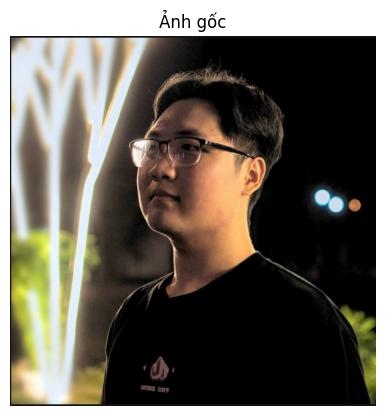

In [468]:
#Đọc ảnh
anhBgr = cv2.imread('/content/drive/MyDrive/Image_processing/OnTapGiuaKy/anhreal.png', cv2.IMREAD_UNCHANGED)
anhRgb = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2RGB)
plt.imshow(anhRgb)
plt.title('Ảnh gốc')
plt.axis('off')
plt.show()

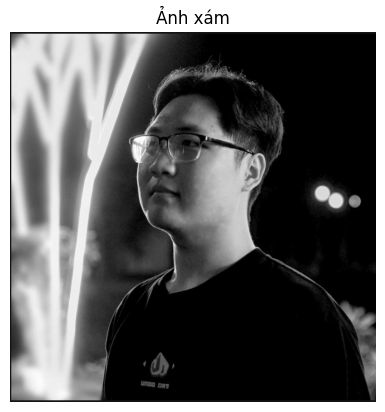

In [469]:
#Chuyển sang ảnh xám
anhXam = cv2.cvtColor(anhRgb, cv2.COLOR_RGB2GRAY)
plt.imshow(anhXam, cmap='gray')
plt.title('Ảnh xám')
plt.axis('off')
plt.show()

In [470]:
#Thực hiện Robert
def bo_loc_roberts(anh):
    # Kernel của Roberts
    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

    # Tính gradient theo hướng x và y
    Gx = cv2.filter2D(anh, -1, kernel_x)
    Gy = cv2.filter2D(anh, -1, kernel_y)

    # Tính độ lớn gradient
    G = np.sqrt(Gx**2 + Gy**2)
    G = np.uint8(G)

    return G

In [471]:
#Thực hiện sobel
def bo_loc_sobel(anh):
    # Tính gradient theo trục x và y
    Gx = cv2.Sobel(anh, cv2.CV_64F, 1, 0, ksize=3)  # Gradient theo x
    Gy = cv2.Sobel(anh, cv2.CV_64F, 0, 1, ksize=3)  # Gradient theo y

    # Tính độ lớn gradient
    G = np.sqrt(Gx**2 + Gy**2)
    G = np.uint8(G)  # Chuyển về kiểu số nguyên 8 bit

    return G

In [472]:
#Thực hiện prewitt
def bo_loc_prewitt(anh):
    """
    Thực hiện bộ lọc Prewitt để phát hiện biên trong ảnh.

    Parameters:
    anh (np.array): Ảnh đầu vào (ảnh mức xám).

    Returns:
    np.array: Ảnh đã qua bộ lọc Prewitt.
    """
    # Kernel Prewitt theo hướng x và y
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

    # Tính gradient theo hướng x và y
    Gx = cv2.filter2D(anh, -1, kernel_x)
    Gy = cv2.filter2D(anh, -1, kernel_y)

    # Tính độ lớn gradient
    G = np.sqrt(Gx**2 + Gy**2)
    G = np.uint8(G)

    return G

In [473]:
#Thực hiện laplacian
def bo_loc_laplacian(anh, ksize=3):
    """
    Thực hiện bộ lọc Laplacian để phát hiện biên trong ảnh.

    Parameters:
    anh (np.array): Ảnh đầu vào (ảnh mức xám).
    ksize (int): Kích thước kernel (là số lẻ, thường là 1, 3, 5, 7...).

    Returns:
    np.array: Ảnh đã qua bộ lọc Laplacian.
    """
    # Áp dụng bộ lọc Laplacian
    G = cv2.Laplacian(anh, cv2.CV_64F, ksize=ksize)

    # Chuyển đổi giá trị về uint8
    G = np.uint8(np.absolute(G))

    return G

In [474]:
AnhRobert = bo_loc_roberts(anhXam)
AnhSobel = bo_loc_sobel(anhXam)
AnhPrewitt = bo_loc_prewitt(anhXam)
AnhLaplacian = bo_loc_laplacian(anhXam,3)

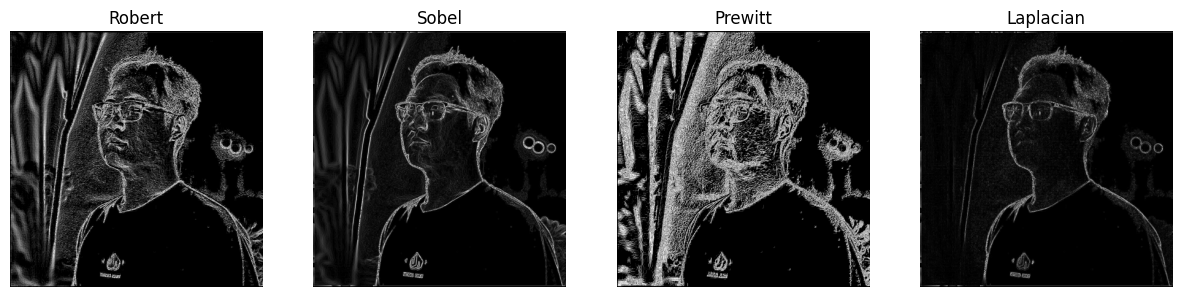

In [475]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(AnhRobert, cmap='gray')
plt.title('Robert')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(AnhSobel, cmap='gray')
plt.title('Sobel')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(AnhPrewitt, cmap='gray')
plt.title('Prewitt')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(AnhLaplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.show()

b) Viết hàm làm sắc nét ảnh với bộ lọc tương ứng ở câu a. Hiển thị kết quả sau khi làm sắc
nét.

In [476]:
def lam_net_anh(anh, anh_bo_loc):
  sac_net = cv2.addWeighted(anh, 1.0, anh_bo_loc, 1.0, 0) #alpha, beta là tỷ lệ ảnh một, ảnh hai và 0 là không điều chỉnh gì thêm
  return sac_net

In [477]:
AnhRobert_net = lam_net_anh(anhXam, AnhRobert)
AnhSobel_net = lam_net_anh(anhXam, AnhSobel)
AnhPrewitt_net = lam_net_anh(anhXam, AnhPrewitt)
AnhLaplacian_net = lam_net_anh(anhXam, AnhLaplacian)

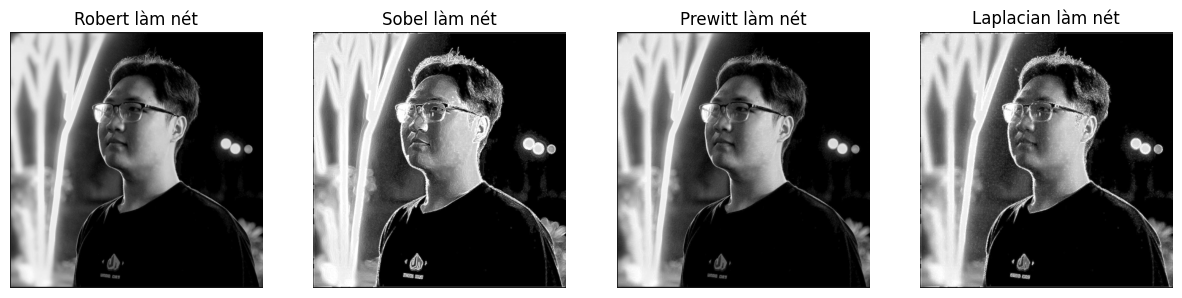

In [478]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(AnhRobert_net, cmap='gray')
plt.title('Robert làm nét')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(AnhSobel_net, cmap='gray')
plt.title('Sobel làm nét')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(AnhPrewitt_net, cmap='gray')
plt.title('Prewitt làm nét')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(AnhLaplacian_net, cmap='gray')
plt.title('Laplacian làm nét')
plt.axis('off')

plt.show()

c) Viết lại hàm xác định ngưỡng toàn cục hoặc otsu (ở trên có)

In [479]:
def xac_dinh_nguong(img):
    ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return ret  # Trả về giá trị ngưỡng


d) Viết hàm phân đoạn ảnh xám với ngưỡng T xác định ở câu c

In [480]:
nguong = xac_dinh_nguong(grayImg)
print("Ngưỡng xác định được: ", nguong)

Ngưỡng xác định được:  98.0


In [481]:
def phan_doan_anh(img, threshold):
    _, img_segmented = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return img_segmented

In [482]:
AnhRobert_net_cat_nguong = phan_doan_anh(AnhRobert_net, nguong)
AnhLaplacian_net_cat_nguong = phan_doan_anh(AnhLaplacian_net, nguong)
AnhSobel_net_cat_nguong = phan_doan_anh(AnhSobel_net, nguong)
AnhPrewitt_net_cat_nguong = phan_doan_anh(AnhPrewitt_net, nguong)

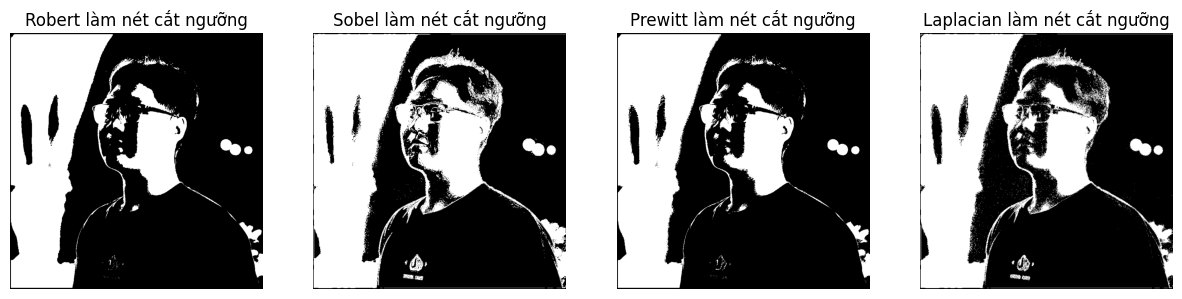

In [483]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(AnhRobert_net_cat_nguong, cmap='gray')
plt.title('Robert làm nét cắt ngưỡng')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(AnhSobel_net_cat_nguong, cmap='gray')
plt.title('Sobel làm nét cắt ngưỡng')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(AnhPrewitt_net_cat_nguong, cmap='gray')
plt.title('Prewitt làm nét cắt ngưỡng')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(AnhLaplacian_net_cat_nguong, cmap='gray')
plt.title('Laplacian làm nét cắt ngưỡng')
plt.axis('off')

plt.show()

e) Thực hiện các phép toán xử lý hình thái (Morphological) để tinh chỉnh ảnh sau phân đoạn.

In [484]:
# Erosion
#kernel = np.ones((3, 3), np.uint8)
#eroded_image = cv2.erode(binary_image, kernel, iterations=1)
#cv2.imshow('Erosion', eroded_image)
# Hàm co rút ảnh => cho opening hoặc closing

In [485]:
# Dilation
# dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
# cv2.imshow('Dilation', dilated_image)
# giãn nỡ ảnh => cho closing hoặc open

In [486]:
# Opening
# opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
# cv2.imshow('Opening', opened_image)
# Mở ảnh => giản ảnh rồi co ảnh => Loại bỏ nhiễu nhỏ

In [487]:
# Closing
# closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
# cv2.imshow('Closing', closed_image)
# Đóng ảnh => ảnh co rồi giãn ra => Lắp đầy nhiễu nhỏ

In [488]:
# Gradient
# gradient_image = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)
# cv2.imshow('Gradient', gradient_image)
# Tính biên => mịn cạnh và nổi bật biên

In [489]:
# Top-hat
# tophat_image = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, kernel)
# cv2.imshow('Top-hat', tophat_image)
# Tách nền tối => nổi bật đối tượng sáng

In [490]:
# Black-hat
# blackhat_image = cv2.morphologyEx(binary_image, cv2.MORPH_BLACKHAT, kernel)
# cv2.imshow('Black-hat', blackhat_image)
# Tách nền sáng => nổi bật đối tượng tối

In [491]:
#B1 loại bỏ nhiễu:
kernel = np.ones((7, 7), np.uint8)
AnhRobert = cv2.morphologyEx(AnhRobert_net_cat_nguong, cv2.MORPH_OPEN, kernel)
AnhSobel = cv2.morphologyEx(AnhSobel_net_cat_nguong, cv2.MORPH_OPEN, kernel)
AnhPrewitt = cv2.morphologyEx(AnhPrewitt_net_cat_nguong, cv2.MORPH_OPEN, kernel)
AnhLaplacian = cv2.morphologyEx(AnhPrewitt_net_cat_nguong, cv2.MORPH_OPEN, kernel)

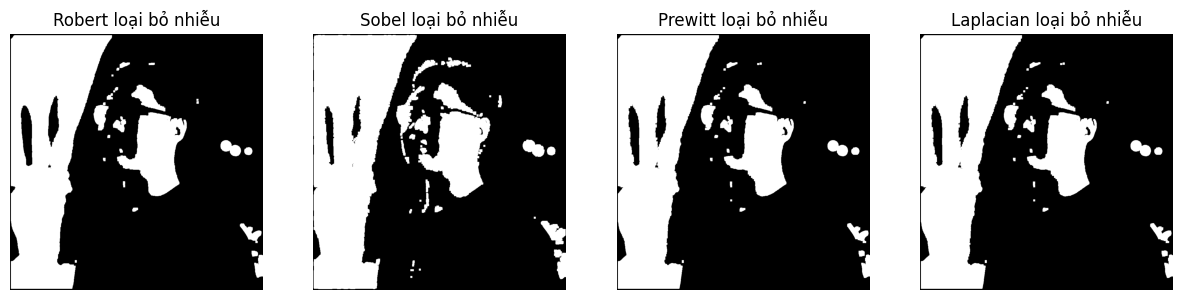

In [492]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(AnhRobert, cmap='gray')
plt.title('Robert loại bỏ nhiễu')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(AnhSobel, cmap='gray')
plt.title('Sobel loại bỏ nhiễu')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(AnhPrewitt, cmap='gray')
plt.title('Prewitt loại bỏ nhiễu')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(AnhLaplacian, cmap='gray')
plt.title('Laplacian loại bỏ nhiễu')
plt.axis('off')

plt.show()

In [493]:
#B2: Lắp đầy nhiễu
AnhRobert = cv2.morphologyEx(AnhRobert, cv2.MORPH_CLOSE,kernel)
AnhSobel = cv2.morphologyEx(AnhSobel, cv2.MORPH_CLOSE,kernel)
AnhPrewitt = cv2.morphologyEx(AnhPrewitt, cv2.MORPH_CLOSE,kernel)
AnhLaplacian = cv2.morphologyEx(AnhLaplacian, cv2.MORPH_CLOSE, kernel)

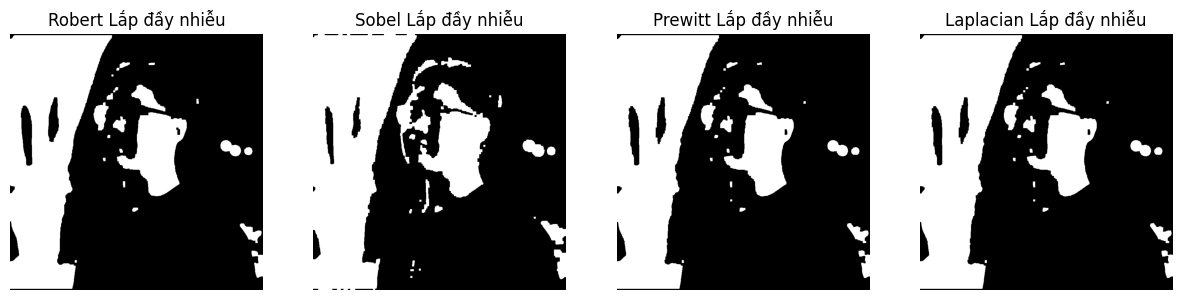

In [494]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(AnhRobert, cmap='gray')
plt.title('Robert Lắp đầy nhiễu')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(AnhSobel, cmap='gray')
plt.title('Sobel Lắp đầy nhiễu')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(AnhPrewitt, cmap='gray')
plt.title('Prewitt Lắp đầy nhiễu')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(AnhLaplacian, cmap='gray')
plt.title('Laplacian Lắp đầy nhiễu')
plt.axis('off')

plt.show()

f) Xác định biên ảnh

In [503]:
bienRobert = cv2.Canny(AnhRobert, 100,200)
bienSobel = cv2.Canny(AnhSobel, 100,200)
bienPrewitt = cv2.Canny(AnhPrewitt, 100,200)
bienLaplacian = cv2.Canny(AnhLaplacian, 100,200)

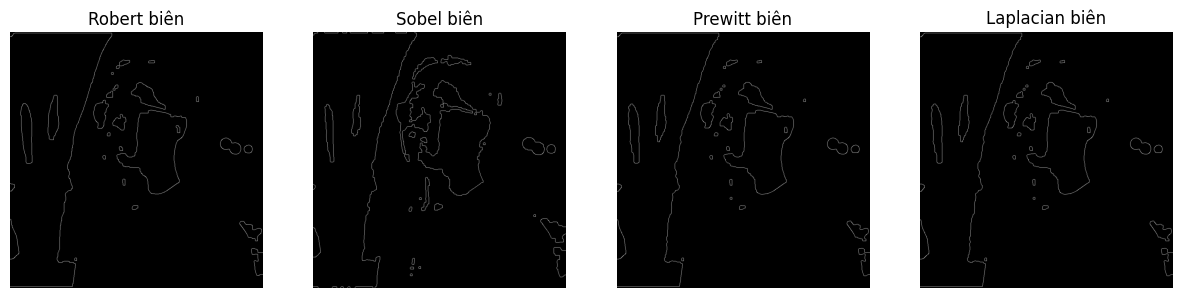

In [504]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(bienRobert, cmap='gray')
plt.title('Robert biên')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(bienSobel, cmap='gray')
plt.title('Sobel biên')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(bienPrewitt, cmap='gray')
plt.title('Prewitt biên')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(bienLaplacian, cmap='gray')
plt.title('Laplacian biên')
plt.axis('off')

plt.show()